2018-02-18

In [1]:
%matplotlib inline

import os
import cPickle
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import normalize
from gensim.models import Word2Vec
from utils.traduceids import TraduceIds

In [2]:
N_DIMS = 256
WDW = 8

NB_PATH = os.getcwd()
PKL_BASE_PATH = os.path.join(NB_PATH, 'txt', 'solo_tkns', '{0}')
MODELO_BASE_PATH = os.path.join(NB_PATH, 'modelos', 'w2v-{}-{}'.format(WDW, N_DIMS), '{0}')

DIC_TKNS = PKL_BASE_PATH.format('dict_tokens.p')
PKL_MDL = MODELO_BASE_PATH.format('modelo.p')

In [3]:
ids_tkns = cPickle.load(open(DIC_TKNS, 'rb'))
tkns_ids = dict((v, k) for k, v in ids_tkns.iteritems())

In [4]:
traductor = TraduceIds(ids_tkns_pkl=DIC_TKNS)
modelo = Word2Vec.load(PKL_MDL)

In [17]:
trabajos_hombre =[
    (u'_'.join(map(lambda x: tkns_ids[x], i.split('_'))), sim) 
    for i, sim 
    in modelo.wv.most_similar_cosmul(
        positive=[ids_tkns['hombre'], ids_tkns[u'trabajo']], 
        topn=30)
]

print "TRABAJO + HOMBRE:\n"

for tkn, score in trabajos_hombre:
    espacios = 20 - len(tkn)
    print u'{}:{}{:04.3f}'.format(tkn, ' ' * espacios, score)
    
trabajos_mujer =[
    (u'_'.join(map(lambda x: tkns_ids[x], i.split('_'))), sim) 
    for i, sim 
    in modelo.wv.most_similar_cosmul(
        positive=[ids_tkns['mujer'], ids_tkns[u'trabajo']], 
        topn=30)
]

print "\n\n"
print "TRABAJO + MUJER:\n"

for tkn, score in trabajos_mujer:
    espacios = 20 - len(tkn)
    print u'{}:{}{:04.3f}'.format(tkn, ' ' * espacios, score)

TRABAJO + HOMBRE:

trabajador:          0.466
desocupado:          0.435
muchacho:            0.429
metódico:            0.425
esclavo:             0.421
desempleado:         0.418
oficinista:          0.418
empleado:            0.417
individuo:           0.417
honesto:             0.413
albañil:             0.413
oficio:              0.410
peón:                0.408
artesano:            0.408
operario:            0.408
capataz:             0.407
analfabeto:          0.406
carpintero:          0.405
perfeccionista:      0.404
laburante:           0.403
self_made_man:       0.403
meticuloso:          0.402
jornalero:           0.402
obsesivo:            0.402
aprendiz:            0.402
laburo:              0.401
patrón:              0.401
personal:            0.401
sirviente:           0.400
profesión:           0.400



TRABAJO + MUJER:

empleada_doméstica:  0.483
marido:              0.465
cuidadora:           0.448
madre:               0.447
maternidad:          0.440
ella:          

In [6]:
ejes = {
    'mujer': [ids_tkns[tkns] for tkns in [u'mujer', u'mujeres', u'femenino', u'ella']],
    'hombre': [ids_tkns[tkns] for tkns in [u'hombre', u'hombres', u'masculino', u'él']],
    'poder': [ids_tkns[tkns] for tkns in [u'mandato', u'presidencia', 
                                          u'autoridad', u'superior', u'gerencia',
                                          u'jefe', u'jefa', u'dirigir', 
                                          u'liderar', u'ordenar', u'directivo',
                                          u'liderazgo', u'autonomía', u'privilegio', 
                                          u'emprender', u'monarquía', u'poder',
                                          u'poderoso', u'poderosa', u'corona',
                                          u'dueño', u'dueña', u'fortaleza',
                                          u'capacidad', u'gobernar', u'más', 
                                          u'cabeza', u'emperador', u'imperio']],
    'nopoder': [ids_tkns[tkns] for tkns in [u'subordinado', u'subordinada', u'hombre', 
                                            u'mujer', u'inferior', u'pueblo',
                                            u'seguir', u'obedecer', u'dependencia', 
                                            u'plebeyo', u'privación', u'depender',
                                            u'subordinarse', u'plebeya', u'común', 
                                            u'debilidad', u'menos', u'pies',
                                            u'súbdito']]
}

In [7]:
pares = [(u'empleado', u'empleada'), (u'rey', u'reina'), 
         (u'científico', u'científica'), (u'jefe', u'jefa'), 
         (u'macho', u'hembra'), (u'padre', u'madre'), 
         (u'hijo', u'hija'), (u'niño', u'niña'), 
         (u'señor', u'señora'), (u'presidente', u'presidenta'),
         (u'enfermero', u'enfermera'), (u'abogado', u'abogada'), 
         (u'ingeniero', u'ingeniera'), (u'león', u'leona'), 
         (u'toro', u'vaca'), (u'perro', u'perra'),
         (u'caballo', u'yegua'), (u'diputado', u'diputada'), 
         (u'senador', u'senadora'), (u'gobernador', u'gobernadora'), 
         (u'juez', u'jueza'), (u'doctor', u'doctora'),
         (u'cocinero', u'cocinera'), (u'médico', u'médica'), 
         (u'maestro', u'maestra'), (u'bailarín', u'bailarina'),
         (u'gerente', u'gerenta'), (u'diseñador', u'diseñadora'),
         (u'director', u'directora'), (u'jugador', u'jugadora'),
         (u'arquitecto', u'arquitecta'), (u'profesor', u'profesora'),
         (u'sirviente', u'sirvienta'), (u'secretario', u'secretaria'),
         (u'trabajador', u'trabajadora'), (u'actor', u'actriz'),
         (u'abuelo', u'abuela'), (u'caballero', u'dama')]
pares_flat = reduce(lambda x, y: x + y, map(lambda x: list(x), pares))
entidades = [u'_'.join(map(lambda x: ids_tkns[x], tkns.split('_'))) for tkns in pares_flat]

In [9]:
ejes_arr = dict(
    (k, np.array([modelo.wv.get_vector(ids) for ids in l_ids])) 
    for k, l_ids in ejes.iteritems()
)

In [10]:
def encuentra_eje(extremo_sup, extremo_inf, normalizar=True):
    if normalizar:
        e1, e2 = normalize(extremo_sup), normalize(extremo_inf)
    else:
        e1, e2 = extremo_sup, extremo_inf
        
    eje = normalize(np.mean(e1, axis=0).reshape(1, -1)) - np.mean(np.array([
        normalize(np.mean(e1, axis=0).reshape(1, -1)), 
        normalize(np.mean(e2, axis=0).reshape(1, -1))]), axis=0)
    return normalize(eje)[0]

In [11]:
eje_poder = encuentra_eje(ejes_arr['poder'], ejes_arr['nopoder'], normalizar=True)
eje_genero = encuentra_eje(ejes_arr['mujer'], ejes_arr['hombre'], normalizar=True)

In [12]:
scores_jerarquia = [np.dot(eje_poder, modelo.wv.get_vector(entidad)) for entidad in entidades]
scores_genero = [np.dot(eje_genero, modelo.wv.get_vector(entidad)) for entidad in entidades]

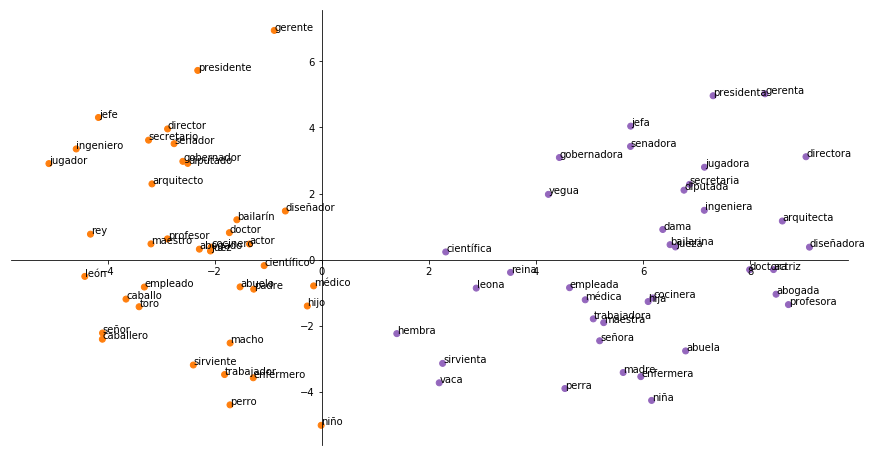

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
colores = ['tab:orange' if n%2==0 else 'tab:purple' for n in xrange(len(pares_flat))]

plt.scatter(scores_genero, scores_jerarquia, c=colores)
for lbl, x, y in zip(pares_flat, scores_genero, scores_jerarquia):
    plt.annotate(s=lbl, xy=(x, y), xytext=(x + .005, y + .005))

In [14]:
def compara(x, y):
    if x > y:
        return 1
    elif x < y:
        return -1
    else:
        return 0

etiquetas = [u'{} - {}'.format(t1, t2) for t1, t2 in pares]
a_values = [x for i, x in enumerate(scores_jerarquia) if i%2==0]
b_values = [x for i, x in enumerate(scores_jerarquia) if i%2==1]

zipped = zip(etiquetas, a_values, b_values)
ordenada2 = sorted(zipped, cmp=lambda x, y: compara(max(x[1:3]), max(y[1:3])))[::-1]

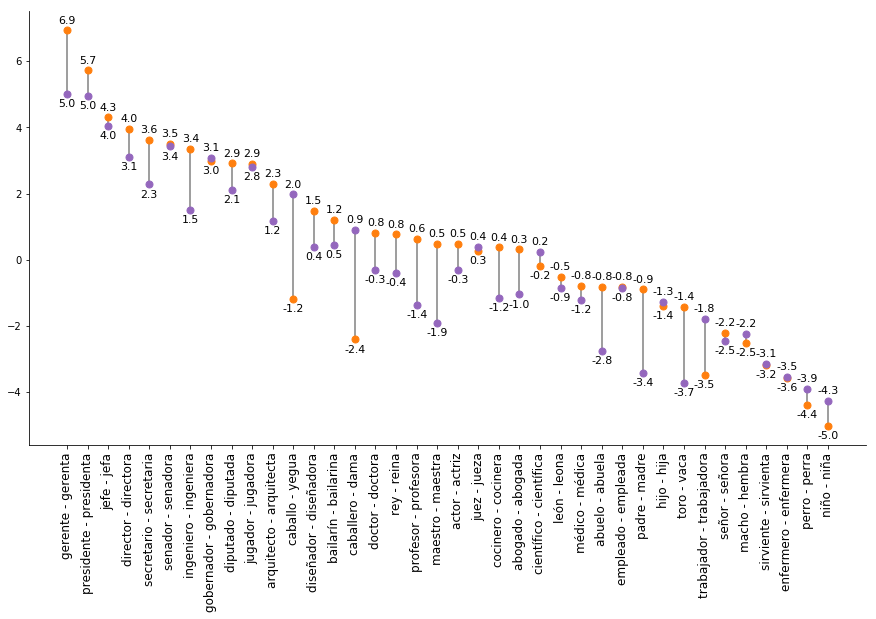

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1)

for i in list(range(len(ordenada2))):

    ax.plot([ordenada2[i][0], ordenada2[i][0]], 
            [ordenada2[i][1], ordenada2[i][2]], 
            color='gray')

    ax.plot(ordenada2[i][0], ordenada2[i][1], color='tab:orange', marker='o', markersize=7)
    ax.plot(ordenada2[i][0], ordenada2[i][2], color='tab:purple', marker='o', markersize=7)
    
    valig = (0.3, -0.3) if ordenada2[i][1]>ordenada2[i][2] else (-0.3, 0.3)
    ax.text(ordenada2[i][0], ordenada2[i][1]+valig[0], '{:2.1f}'.format(ordenada2[i][1]), 
            horizontalalignment='center', verticalalignment='center', 
            color='black', fontsize=11)
    ax.text(ordenada2[i][0],ordenada2[i][2]+valig[1], '{:2.1f}'.format(ordenada2[i][2]), 
            horizontalalignment='center', verticalalignment='center', 
            color='black', fontsize=11)



ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.xticks(rotation=90,fontsize=12)
plt.show()

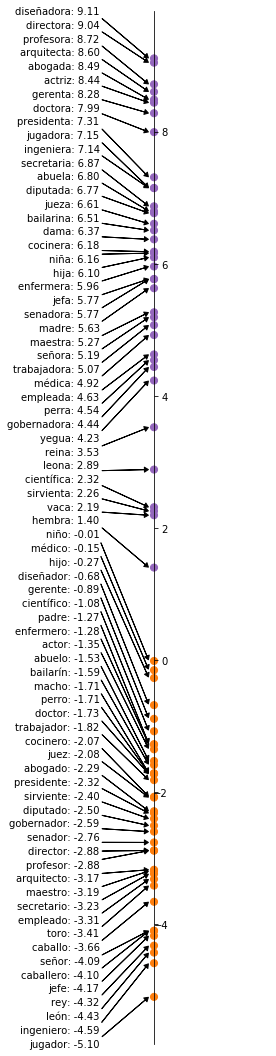

In [16]:
fig = plt.figure(figsize=(4,19))
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('zero')

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.tick_params(axis="y",direction="in", pad=-14,labelsize=10)
ax.xaxis.set_visible(False)
colores = ['tab:orange' if n%2==0 else 'tab:purple' for n in xrange(len(pares_flat))]

ax.scatter(np.zeros(len(scores_genero)), scores_genero, c=colores, s=50)

y_max = max(scores_genero)
y_min = min(scores_genero)
gap = y_max-y_min
pasos = len(scores_genero)
rng_etiquetas = np.linspace(y_min-gap*0.05, y_max+gap*0.05, pasos)
y_etiquetas = [0] * pasos
for i, n in enumerate(sorted(xrange(len(scores_genero)), key=lambda x: scores_genero[x])):
    y_etiquetas[n] = rng_etiquetas[i]
arrowprops = dict(facecolor='black', shrink=0.01, headlength=4, width=0.007, headwidth=5)

for lbl, x, y, y_et in zip(pares_flat, np.zeros(len(scores_genero)), scores_genero, y_etiquetas):
    plt.annotate(s=u'{}: {:03.2f}'.format(lbl, y), 
                 xy=(x - 0.0008, y), 
                 xytext=(x - .0085, y_et), 
                 arrowprops=arrowprops,
                 horizontalalignment='right',
                 verticalalignment='center')